#April Doing

In [ ]:
#assume df is loaded
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Prepare the Data
# Load and preprocess your sentiment classification dataset
# Assuming you have X_train and y_train as your training data and labels

# Step 2: Prepare Features and Labels
# Extract features from your preprocessed data
# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 4: Train a Gradient Boosting Model
# Instantiate an XGBoost classifier with desired hyperparameters
gbm = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Step 5: Evaluate the Model
# Predict on the test data
y_pred = gbm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Fine-tune and Optimize
# Experiment with different hyperparameter settings, feature representations, etc.
# Repeat the process of training, evaluating, and fine-tuning until desired performance is achieved



In [ ]:
import xgboost as xgb

# Assuming 'X' and 'y' are your feature matrix and target vector, respectively
dtrain = xgb.DMatrix(data=X, label=y, enable_categorical=True)


In [ ]:
X_train = df['review']
y_train = df['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(df['review'])
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, df['label'], test_size=0.2, random_state=42)
gbm = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=7,
    subsample=0.8,
    random_state=42
)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.775


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load and preprocess your sentiment classification dataset into a DataFrame (df)
# Assuming you have df with 'review' as features and 'label' as labels

# Extract features and labels from the DataFrame
X = df['review']
y = df['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Instantiate a base classifier (e.g. DecisionTreeClassifier) and an AdaBoost classifier
base_classifier = DecisionTreeClassifier(max_depth=10) # You can adjust the hyperparameters of the base classifier
ada_boost = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=42) # You can adjust the hyperparameters of AdaBoost

# Fit the model to the training data
ada_boost.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred = ada_boost.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Fine-tune and optimize the model as needed


Accuracy: 0.7285714285714285


# Exploring sklearn inbuilt datasets

In [ ]:
from sklearn import datasets

In [ ]:
cancer=datasets.load_breast_cancer()

In [ ]:
x=cancer.data
y=cancer.target


In [ ]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
features=cancer.feature_names

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# stratified/normal Kfold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load your dataset
docs = ['this is the first document', 'this is the second document', 'third document is here', 'the last document']

# Define the labels for each document
labels = ['class 1', 'class 1', 'class 2', 'class 2']

# Define the number of folds
k = 4

# Define the vectorizer to transform the documents into a bag-of-words representation
vectorizer = CountVectorizer()

# Transform the documents into a bag-of-words representation
X = vectorizer.fit_transform(docs)

# Define the model
model = MultinomialNB()

# Define the cross-validation method
kfold = KFold(n_splits=k, shuffle=True)

# Evaluate the model using k-fold cross-validation
scores = cross_val_score(model, X, labels, cv=kfold)

# Print the average performance across all folds
print("Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores) * 100, np.std(scores) * 100))


Accuracy: 50.00% (+/- 50.00%)


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(r)

# from sklearn import linear_model
# lr=linear_model.LogisticRegression()
# lst_accu_stratified=[]

# from sklearn.model_selection import StratifiedKFold
# skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

# for train_index,test_index in skf.split(x,y):
#   x_train_fold,x_test_fold=x_scaled[train_index],x_scaled[test_index]
#   y_train_fold,y_test_fold=y[train_index],y[test_index]
#   lr.fit(x_train_fold,y_train_fold)
#   lst_accu_stratified.append(lr.score(x_test_fold,y_test_fold))

# from statistics import mean,stdev

# print('List of possible accuracy:', lst_accu_stratified)
# print('\nMaximum Accuracy That can be obtained from this model is:',	max(lst_accu_stratified)*100, '%')
# print('\nMinimum Accuracy:',	min(lst_accu_stratified)*100, '%')
# print('\nOverall Accuracy:',	mean(lst_accu_stratified)*100, '%')
# print('\nStandard Deviation is:', stdev(lst_accu_stratified))

# Skeletal Code

Getting Sentiment Data

In [ ]:
#You've gotten data but how will you label 'em??
#use pos and neg folder classification, and define a lambda?

In [ ]:
def remove_non_ascii_1(text):
  return ''.join([i if ord(i) < 128 else ' ' for i in text])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
path="/content/drive/MyDrive/ProjectFiles/reviewzz"

reviews_pos = os.listdir(path+"/pos")
reviews_neg = os.listdir(path+"/neg")
reviews=[]
for i in reviews_pos:
  reviews.append(i)
for i in reviews_neg:
  reviews.append(i)
r=[]
for i in reviews_pos:
  f=open(path+'/pos/'+i,mode='rb')
  no_ascii=remove_non_ascii_1(str(f.read()))
  r.append((no_ascii,i))
  f.close()
for i in reviews_neg:
  f=open(path+'/neg/'+i,mode='rb')
  no_ascii=remove_non_ascii_1(str(f.read()))
  r.append((no_ascii,i))
  f.close()



Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.DataFrame(r)
df['label']=df[1].apply(lambda x: 1 if x[0:3]=='pos' else 0)
df.columns=['review','file_name','label']
df= df.drop('file_name',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

tuning=[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0]
X_train,X_test,y_train,y_test=train_test_split(df.review,df.label,test_size=0.2,random_state=False)

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC



v = CountVectorizer()
X_train = v.fit_transform(X_train).toarray()
model=GaussianNB()
model.fit(X_train,y_train)

X_test = v.transform(X_test).toarray()
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))


In [ ]:
v = CountVectorizer()
#X_train = v.fit_transform(X_train).toarray()
model=MultinomialNB()
model.fit(X_train,y_train)

#X_test = v.transform(X_test).toarray()
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       135
           1       0.83      0.75      0.79       145

    accuracy                           0.79       280
   macro avg       0.79      0.79      0.79       280
weighted avg       0.79      0.79      0.79       280



In [ ]:
v=CountVectorizer()
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7607142857142857


# Hyperparameter tuning


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
hyperparameter_tuning=[]
for i in tuning:
  model=MultinomialNB(alpha=i)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  hyperparameter_tuning.append((i,accuracy_score(y_test,y_pred)))
print(hyperparameter_tuning)

# Coding an ANN in PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class BasicNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-.85),requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.8),requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.),requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(-16.),requires_grad=False)


  def forward(self, input):
    input_to_top_relu = input * self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output * self.w01

    input_to_bottom_relu = input * self.w10 + self.b10
    bottom_relu_ouput = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_ouput * self.w11

    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

    output = F.relu(input_to_final_relu)
    return output



In [ ]:
input_doses = torch.linspace(start=0, end=1, steps=11)

In [ ]:
model = BasicNN()
output_values = model(input_doses)

<Axes: >

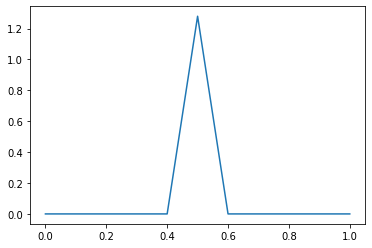

In [ ]:
sns.lineplot(x=input_doses, y=output_values.detach())

In [ ]:
class BasicNN_train(nn.Module):

  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-.85),requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.8),requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.),requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(0.),requires_grad=True)


  def forward(self, input):
    input_to_top_relu = input * self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output * self.w01

    input_to_bottom_relu = input * self.w10 + self.b10
    bottom_relu_ouput = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_ouput * self.w11

    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

    output = F.relu(input_to_final_relu)
    return output

In [ ]:
model = BasicNN_train()
output_values = model(input_doses)

<Axes: >

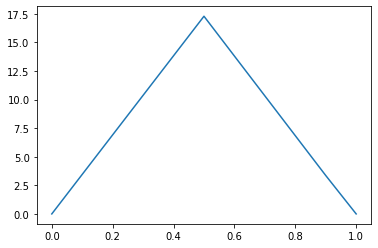

In [ ]:
sns.lineplot(x=input_doses, y=output_values.detach())

# ?Training ANN

In [ ]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [ ]:
optimizer = SGD(model.parameters(), lr=0.1)
print("Final Bias before optimization: "+str(model.final_bias.data)+"\n")
for epoch in range(100):
  total_loss=0
  for iteration in range(len(inputs)):
    input_i = inputs[iteration]
    label_i = labels[iteration]

    output_i = model(input_i)
    loss = (output_i - label_i)**2
    loss.backward()
    total_loss += float(loss)
  if(total_loss<0.0001):
    print("num steps: "+str(epoch))
    break
  optimizer.step()
  optimizer.zero_grad()
  print("Step: "+str(epoch)+" Final_bias: ",str(model.final_bias.data)+"\n")


#New paper Testing(unfruitful)

In [ ]:
!git clone https://github.com/yoonkim/CNN_sentence.git
!pip3 install theano==0.7

fatal: destination path 'CNN_sentence' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""
Sample code for
Convolutional Neural Networks for Sentence Classification
http://arxiv.org/pdf/1408.5882v2.pdf

Much of the code is modified from
- deeplearning.net (for ConvNet classes)
- https://github.com/mdenil/dropout (for dropout)
- https://groups.google.com/forum/#!topic/pylearn-dev/3QbKtCumAW4 (for Adadelta)
"""

import numpy
import theano.tensor.shared_randomstreams
import theano
import theano.tensor as T
from theano.tensor.signal import downsample
from theano.tensor.nnet import conv

def ReLU(x):
    y = T.maximum(0.0, x)
    return(y)
def Sigmoid(x):
    y = T.nnet.sigmoid(x)
    return(y)
def Tanh(x):
    y = T.tanh(x)
    return(y)
def Iden(x):
    y = x
    return(y)

class HiddenLayer(object):
    """
    Class for HiddenLayer
    """
    def __init__(self, rng, input, n_in, n_out, activation, W=None, b=None,
                 use_bias=False):

        self.input = input
        self.activation = activation

        if W is None:
            if activation.func_name == "ReLU":
                W_values = numpy.asarray(0.01 * rng.standard_normal(size=(n_in, n_out)), dtype=theano.config.floatX)
            else:
                W_values = numpy.asarray(rng.uniform(low=-numpy.sqrt(6. / (n_in + n_out)), high=numpy.sqrt(6. / (n_in + n_out)),
                                                     size=(n_in, n_out)), dtype=theano.config.floatX)
            W = theano.shared(value=W_values, name='W')
        if b is None:
            b_values = numpy.zeros((n_out,), dtype=theano.config.floatX)
            b = theano.shared(value=b_values, name='b')

        self.W = W
        self.b = b

        if use_bias:
            lin_output = T.dot(input, self.W) + self.b
        else:
            lin_output = T.dot(input, self.W)

        self.output = (lin_output if activation is None else activation(lin_output))

        # parameters of the model
        if use_bias:
            self.params = [self.W, self.b]
        else:
            self.params = [self.W]

def _dropout_from_layer(rng, layer, p):
    """p is the probablity of dropping a unit
"""
    srng = theano.tensor.shared_randomstreams.RandomStreams(rng.randint(999999))
    # p=1-p because 1's indicate keep and p is prob of dropping
    mask = srng.binomial(n=1, p=1-p, size=layer.shape)
    # The cast is important because
    # int * float32 = float64 which pulls things off the gpu
    output = layer * T.cast(mask, theano.config.floatX)
    return output

class DropoutHiddenLayer(HiddenLayer):
    def __init__(self, rng, input, n_in, n_out,
                 activation, dropout_rate, use_bias, W=None, b=None):
        super(DropoutHiddenLayer, self).__init__(
                rng=rng, input=input, n_in=n_in, n_out=n_out, W=W, b=b,
                activation=activation, use_bias=use_bias)

        self.output = _dropout_from_layer(rng, self.output, p=dropout_rate)

class MLPDropout(object):
    """A multilayer perceptron with dropout"""
    def __init__(self,rng,input,layer_sizes,dropout_rates,activations,use_bias=True):

        #rectified_linear_activation = lambda x: T.maximum(0.0, x)

        # Set up all the hidden layers
        self.weight_matrix_sizes = zip(layer_sizes, layer_sizes[1:])
        self.layers = []
        self.dropout_layers = []
        self.activations = activations
        next_layer_input = input
        #first_layer = True
        # dropout the input
        next_dropout_layer_input = _dropout_from_layer(rng, input, p=dropout_rates[0])
        layer_counter = 0
        for n_in, n_out in self.weight_matrix_sizes[:-1]:
            next_dropout_layer = DropoutHiddenLayer(rng=rng,
                    input=next_dropout_layer_input,
                    activation=activations[layer_counter],
                    n_in=n_in, n_out=n_out, use_bias=use_bias,
                    dropout_rate=dropout_rates[layer_counter])
            self.dropout_layers.append(next_dropout_layer)
            next_dropout_layer_input = next_dropout_layer.output

            # Reuse the parameters from the dropout layer here, in a different
            # path through the graph.
            next_layer = HiddenLayer(rng=rng,
                    input=next_layer_input,
                    activation=activations[layer_counter],
                    # scale the weight matrix W with (1-p)
                    W=next_dropout_layer.W * (1 - dropout_rates[layer_counter]),
                    b=next_dropout_layer.b,
                    n_in=n_in, n_out=n_out,
                    use_bias=use_bias)
            self.layers.append(next_layer)
            next_layer_input = next_layer.output
            #first_layer = False
            layer_counter += 1

        # Set up the output layer
        n_in, n_out = self.weight_matrix_sizes[-1]
        dropout_output_layer = LogisticRegression(
                input=next_dropout_layer_input,
                n_in=n_in, n_out=n_out)
        self.dropout_layers.append(dropout_output_layer)

        # Again, reuse paramters in the dropout output.
        output_layer = LogisticRegression(
            input=next_layer_input,
            # scale the weight matrix W with (1-p)
            W=dropout_output_layer.W * (1 - dropout_rates[-1]),
            b=dropout_output_layer.b,
            n_in=n_in, n_out=n_out)
        self.layers.append(output_layer)

        # Use the negative log likelihood of the logistic regression layer as
        # the objective.
        self.dropout_negative_log_likelihood = self.dropout_layers[-1].negative_log_likelihood
        self.dropout_errors = self.dropout_layers[-1].errors

        self.negative_log_likelihood = self.layers[-1].negative_log_likelihood
        self.errors = self.layers[-1].errors

        # Grab all the parameters together.
        self.params = [ param for layer in self.dropout_layers for param in layer.params ]

    def predict(self, new_data):
        next_layer_input = new_data
        for i,layer in enumerate(self.layers):
            if i<len(self.layers)-1:
                next_layer_input = self.activations[i](T.dot(next_layer_input,layer.W) + layer.b)
            else:
                p_y_given_x = T.nnet.softmax(T.dot(next_layer_input, layer.W) + layer.b)
        y_pred = T.argmax(p_y_given_x, axis=1)
        return y_pred

    def predict_p(self, new_data):
        next_layer_input = new_data
        for i,layer in enumerate(self.layers):
            if i<len(self.layers)-1:
                next_layer_input = self.activations[i](T.dot(next_layer_input,layer.W) + layer.b)
            else:
                p_y_given_x = T.nnet.softmax(T.dot(next_layer_input, layer.W) + layer.b)
        return p_y_given_x

class MLP(object):
    """Multi-Layer Perceptron Class

    A multilayer perceptron is a feedforward artificial neural network model
    that has one layer or more of hidden units and nonlinear activations.
    Intermediate layers usually have as activation function tanh or the
    sigmoid function (defined here by a ``HiddenLayer`` class)  while the
    top layer is a softamx layer (defined here by a ``LogisticRegression``
    class).
    """

    def __init__(self, rng, input, n_in, n_hidden, n_out):
        """Initialize the parameters for the multilayer perceptron

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes the input of the
        architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space in
        which the datapoints lie

        :type n_hidden: int
        :param n_hidden: number of hidden units

        :type n_out: int
        :param n_out: number of output units, the dimension of the space in
        which the labels lie

        """

        # Since we are dealing with a one hidden layer MLP, this will translate
        # into a HiddenLayer with a tanh activation function connected to the
        # LogisticRegression layer; the activation function can be replaced by
        # sigmoid or any other nonlinear function
        self.hiddenLayer = HiddenLayer(rng=rng, input=input,
                                       n_in=n_in, n_out=n_hidden,
                                       activation=T.tanh)

        # The logistic regression layer gets as input the hidden units
        # of the hidden layer
        self.logRegressionLayer = LogisticRegression(
            input=self.hiddenLayer.output,
            n_in=n_hidden,
            n_out=n_out)

        # L1 norm ; one regularization option is to enforce L1 norm to
        # be small

        # negative log likelihood of the MLP is given by the negative
        # log likelihood of the output of the model, computed in the
        # logistic regression layer
        self.negative_log_likelihood = self.logRegressionLayer.negative_log_likelihood
        # same holds for the function computing the number of errors
        self.errors = self.logRegressionLayer.errors

        # the parameters of the model are the parameters of the two layer it is
        # made out of
        self.params = self.hiddenLayer.params + self.logRegressionLayer.params

class LogisticRegression(object):
    """Multi-class Logistic Regression Class

    The logistic regression is fully described by a weight matrix :math:`W`
    and bias vector :math:`b`. Classification is done by projecting data
    points onto a set of hyperplanes, the distance to which is used to
    determine a class membership probability.
    """

    def __init__(self, input, n_in, n_out, W=None, b=None):
        """ Initialize the parameters of the logistic regression

    :type input: theano.tensor.TensorType
    :param input: symbolic variable that describes the input of the
    architecture (one minibatch)

    :type n_in: int
    :param n_in: number of input units, the dimension of the space in
    which the datapoints lie

    :type n_out: int
    :param n_out: number of output units, the dimension of the space in
    which the labels lie

    """

        # initialize with 0 the weights W as a matrix of shape (n_in, n_out)
        if W is None:
            self.W = theano.shared(
                    value=numpy.zeros((n_in, n_out), dtype=theano.config.floatX),
                    name='W')
        else:
            self.W = W

        # initialize the baises b as a vector of n_out 0s
        if b is None:
            self.b = theano.shared(
                    value=numpy.zeros((n_out,), dtype=theano.config.floatX),
                    name='b')
        else:
            self.b = b

        # compute vector of class-membership probabilities in symbolic form
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)

        # compute prediction as class whose probability is maximal in
        # symbolic form
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)

        # parameters of the model
        self.params = [self.W, self.b]

    def negative_log_likelihood(self, y):
        """Return the mean of the negative log-likelihood of the prediction
        of this model under a given target distribution.

    .. math::

    \frac{1}{|\mathcal{D}|} \mathcal{L} (\theta=\{W,b\}, \mathcal{D}) =
    \frac{1}{|\mathcal{D}|} \sum_{i=0}^{|\mathcal{D}|} \log(P(Y=y^{(i)}|x^{(i)}, W,b)) \\
    \ell (\theta=\{W,b\}, \mathcal{D})

    :type y: theano.tensor.TensorType
    :param y: corresponds to a vector that gives for each example the
    correct label

    Note: we use the mean instead of the sum so that
    the learning rate is less dependent on the batch size
    """
        # y.shape[0] is (symbolically) the number of rows in y, i.e.,
        # number of examples (call it n) in the minibatch
        # T.arange(y.shape[0]) is a symbolic vector which will contain
        # [0,1,2,... n-1] T.log(self.p_y_given_x) is a matrix of
        # Log-Probabilities (call it LP) with one row per example and
        # one column per class LP[T.arange(y.shape[0]),y] is a vector
        # v containing [LP[0,y[0]], LP[1,y[1]], LP[2,y[2]], ...,
        # LP[n-1,y[n-1]]] and T.mean(LP[T.arange(y.shape[0]),y]) is
        # the mean (across minibatch examples) of the elements in v,
        # i.e., the mean log-likelihood across the minibatch.
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])

    def errors(self, y):
        """Return a float representing the number of errors in the minibatch ;
    zero one loss over the size of the minibatch

    :type y: theano.tensor.TensorType
    :param y: corresponds to a vector that gives for each example the
    correct label
    """

        # check if y has same dimension of y_pred
        if y.ndim != self.y_pred.ndim:
            raise TypeError('y should have the same shape as self.y_pred',
                ('y', target.type, 'y_pred', self.y_pred.type))
        # check if y is of the correct datatype
        if y.dtype.startswith('int'):
            # the T.neq operator returns a vector of 0s and 1s, where 1
            # represents a mistake in prediction
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()

class LeNetConvPoolLayer(object):
    """Pool Layer of a convolutional network """

    def __init__(self, rng, input, filter_shape, image_shape, poolsize=(2, 2), non_linear="tanh"):
        """
        Allocate a LeNetConvPoolLayer with shared variable internal parameters.

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.dtensor4
        :param input: symbolic image tensor, of shape image_shape

        :type filter_shape: tuple or list of length 4
        :param filter_shape: (number of filters, num input feature maps,
                              filter height,filter width)

        :type image_shape: tuple or list of length 4
        :param image_shape: (batch size, num input feature maps,
                             image height, image width)

        :type poolsize: tuple or list of length 2
        :param poolsize: the downsampling (pooling) factor (#rows,#cols)
        """

        assert image_shape[1] == filter_shape[1]
        self.input = input
        self.filter_shape = filter_shape
        self.image_shape = image_shape
        self.poolsize = poolsize
        self.non_linear = non_linear
        # there are "num input feature maps * filter height * filter width"
        # inputs to each hidden unit
        fan_in = numpy.prod(filter_shape[1:])
        # each unit in the lower layer receives a gradient from:
        # "num output feature maps * filter height * filter width" /
        #   pooling size
        fan_out = (filter_shape[0] * numpy.prod(filter_shape[2:]) /numpy.prod(poolsize))
        # initialize weights with random weights
        if self.non_linear=="none" or self.non_linear=="relu":
            self.W = theano.shared(numpy.asarray(rng.uniform(low=-0.01,high=0.01,size=filter_shape),
                                                dtype=theano.config.floatX),borrow=True,name="W_conv")
        else:
            W_bound = numpy.sqrt(6. / (fan_in + fan_out))
            self.W = theano.shared(numpy.asarray(rng.uniform(low=-W_bound, high=W_bound, size=filter_shape),
                dtype=theano.config.floatX),borrow=True,name="W_conv")
        b_values = numpy.zeros((filter_shape[0],), dtype=theano.config.floatX)
        self.b = theano.shared(value=b_values, borrow=True, name="b_conv")

        # convolve input feature maps with filters
        conv_out = conv.conv2d(input=input, filters=self.W,filter_shape=self.filter_shape, image_shape=self.image_shape)
        if self.non_linear=="tanh":
            conv_out_tanh = T.tanh(conv_out + self.b.dimshuffle('x', 0, 'x', 'x'))
            self.output = downsample.max_pool_2d(input=conv_out_tanh, ds=self.poolsize, ignore_border=True)
        elif self.non_linear=="relu":
            conv_out_tanh = ReLU(conv_out + self.b.dimshuffle('x', 0, 'x', 'x'))
            self.output = downsample.max_pool_2d(input=conv_out_tanh, ds=self.poolsize, ignore_border=True)
        else:
            pooled_out = downsample.max_pool_2d(input=conv_out, ds=self.poolsize, ignore_border=True)
            self.output = pooled_out + self.b.dimshuffle('x', 0, 'x', 'x')
        self.params = [self.W, self.b]

    def predict(self, new_data, batch_size):
        """
        predict for new data
        """
        img_shape = (batch_size, 1, self.image_shape[2], self.image_shape[3])
        conv_out = conv.conv2d(input=new_data, filters=self.W, filter_shape=self.filter_shape, image_shape=img_shape)
        if self.non_linear=="tanh":
            conv_out_tanh = T.tanh(conv_out + self.b.dimshuffle('x', 0, 'x', 'x'))
            output = downsample.max_pool_2d(input=conv_out_tanh, ds=self.poolsize, ignore_border=True)
        if self.non_linear=="relu":
            conv_out_tanh = ReLU(conv_out + self.b.dimshuffle('x', 0, 'x', 'x'))
            output = downsample.max_pool_2d(input=conv_out_tanh, ds=self.poolsize, ignore_border=True)
        else:
            pooled_out = downsample.max_pool_2d(input=conv_out, ds=self.poolsize, ignore_border=True)
            output = pooled_out + self.b.dimshuffle('x', 0, 'x', 'x')
        return output



AttributeError: ignored